In [9]:
# 필요한 라이브러리 임포트
import cv2
import numpy as np
from sklearn.cluster import KMeans
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt
import glob
import json


In [4]:
# 얼굴 영역 추출 함수
def extract_face_crop(image):
    # dlib 초기화
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('res/shape_predictor_68_face_landmarks.dat')

    # 얼굴 검출
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    if len(rects) == 0:
        raise ValueError("No faces detected in the image")

    rect = rects[0]  # 첫 번째 얼굴만 처리
    (x, y, w, h) = (rect.left(), rect.top(), rect.width(), rect.height())

    # 얼굴 크롭
    face_crop = image[max(0, y):y+h, max(0, x):x+w]
    return face_crop

In [5]:
# 피부 영역 추출 함수 (YCrCb 색상 기반)
def extract_skin(image):
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # 피부색 범위 정의
    lower = np.array([0, 133, 77], dtype=np.uint8)
    upper = np.array([255, 173, 127], dtype=np.uint8)

    # 피부색 마스크 생성
    skin_mask = cv2.inRange(ycrcb, lower, upper)
    skin = cv2.bitwise_and(image, image, mask=skin_mask)
    return skin

In [6]:
# 주요 색상 추출 함수
def extract_dominant_colors(image, n_clusters=2):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = img.reshape((-1, 3))  # 2D 배열로 변환

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    
    return kmeans.cluster_centers_


In [7]:
# 결과 시각화 함수
def visualize_results(original, cropped, skin, dominant_colors, title):
    plt.figure(figsize=(15, 5))

    # 원본 이미지
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # 얼굴 크롭
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Face")
    plt.axis("off")

    # 피부 영역
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
    plt.title("Skin Region")
    plt.axis("off")

    # 주요 색상
    plt.subplot(1, 4, 4)
    for i, color in enumerate(dominant_colors):
        plt.fill_between([i, i+1], 0, 1, color=color/255)
    plt.title("Dominant Colors")
    plt.axis("off")

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


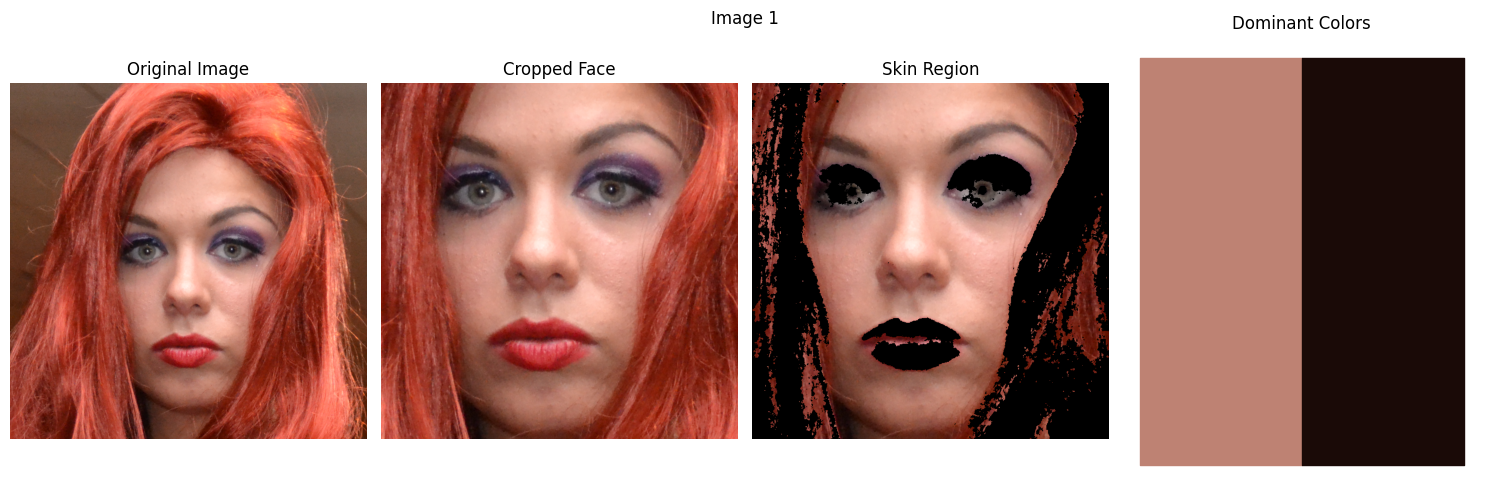

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


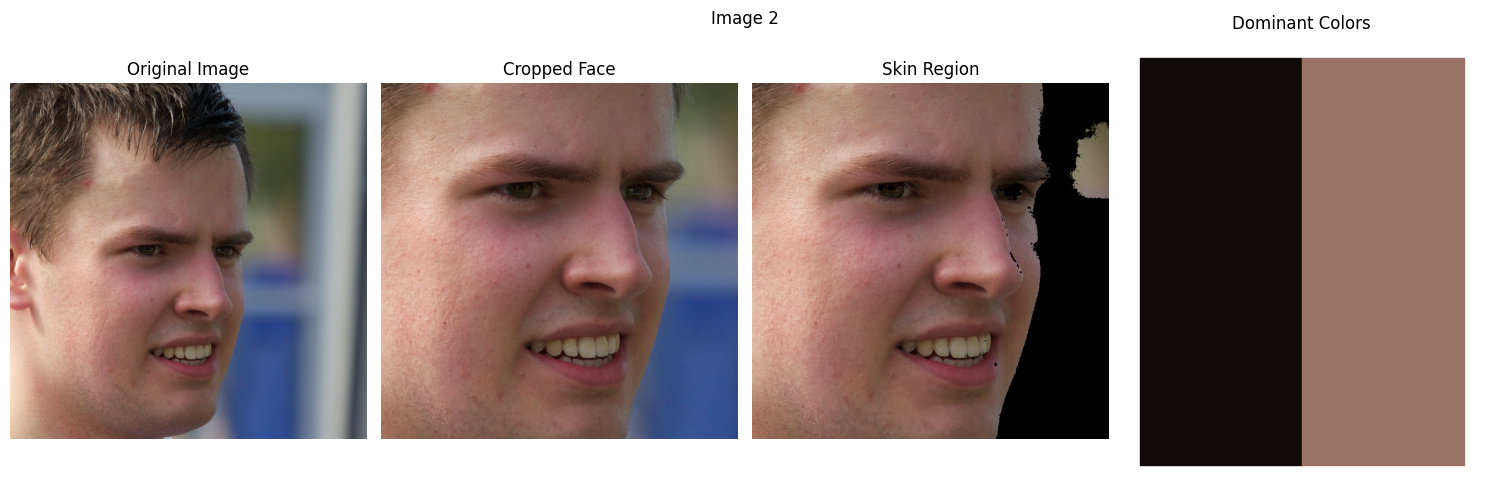

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


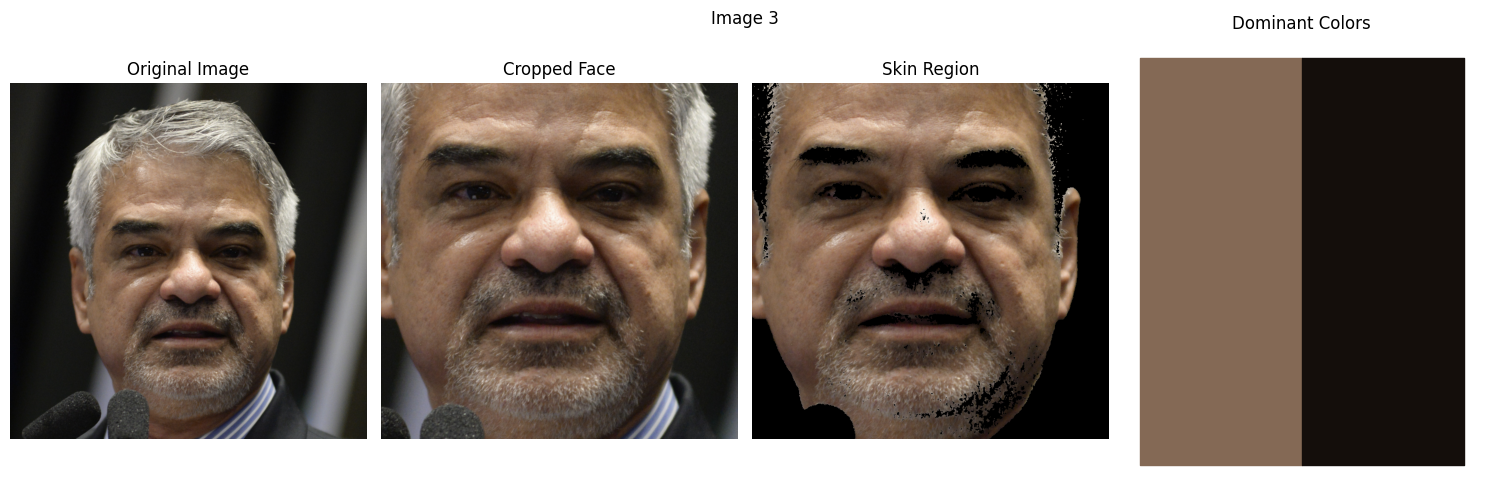

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


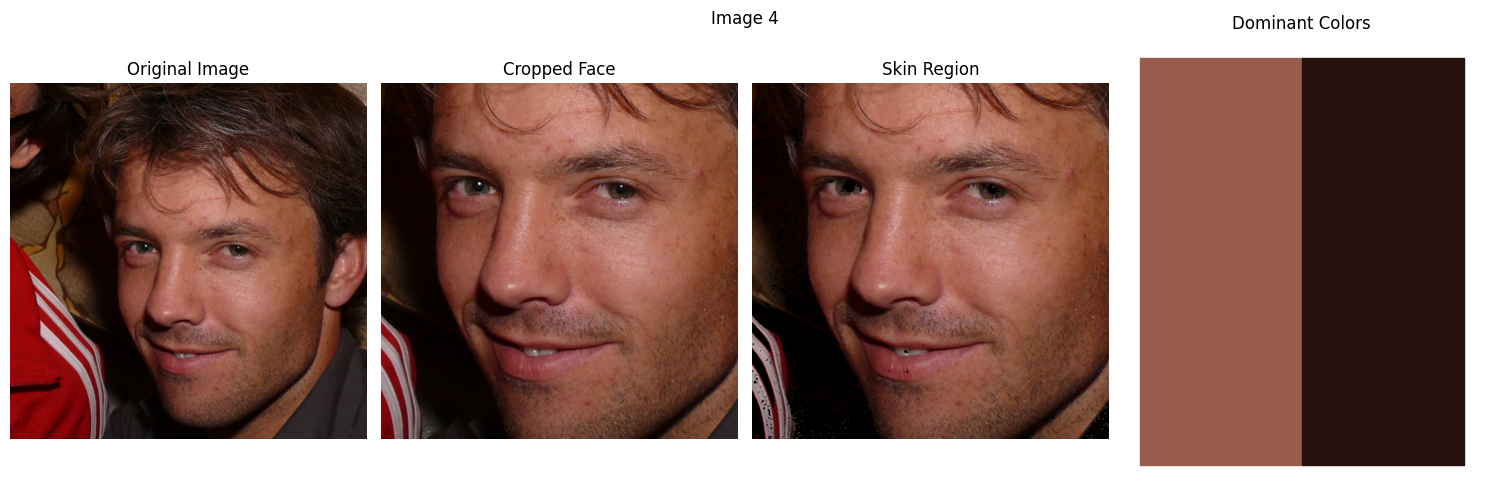

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


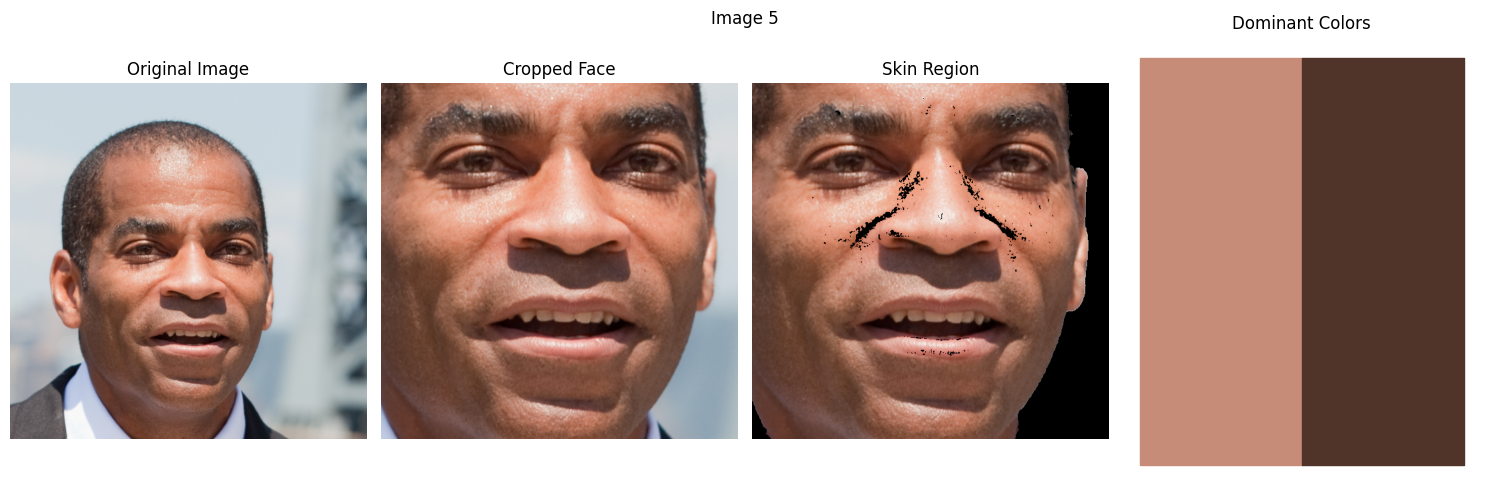

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


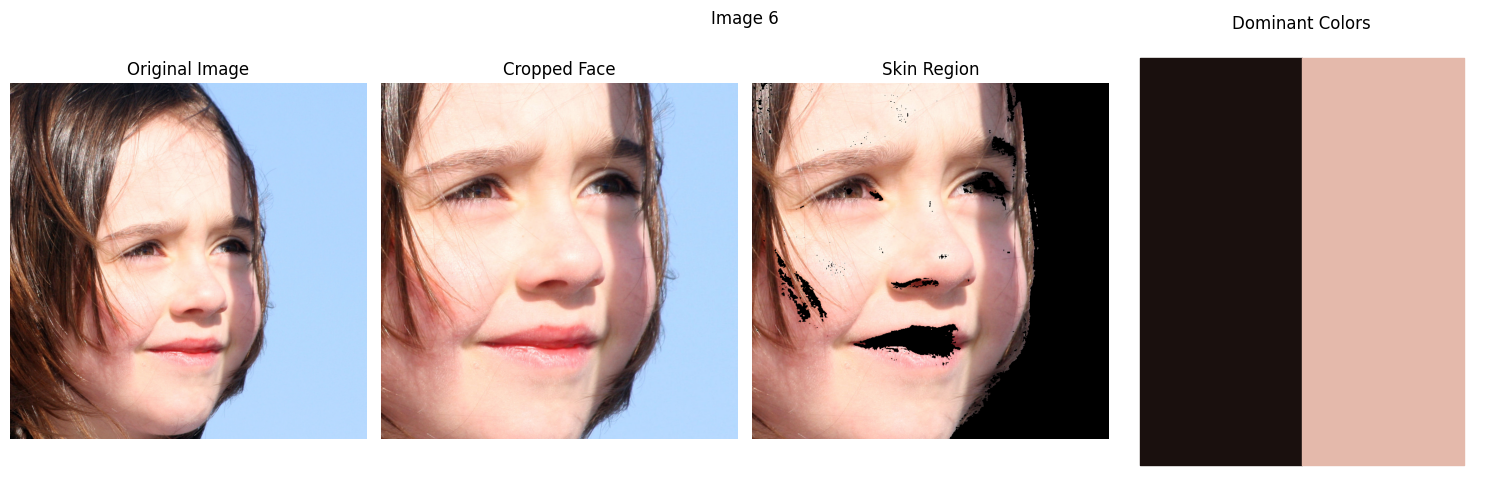

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


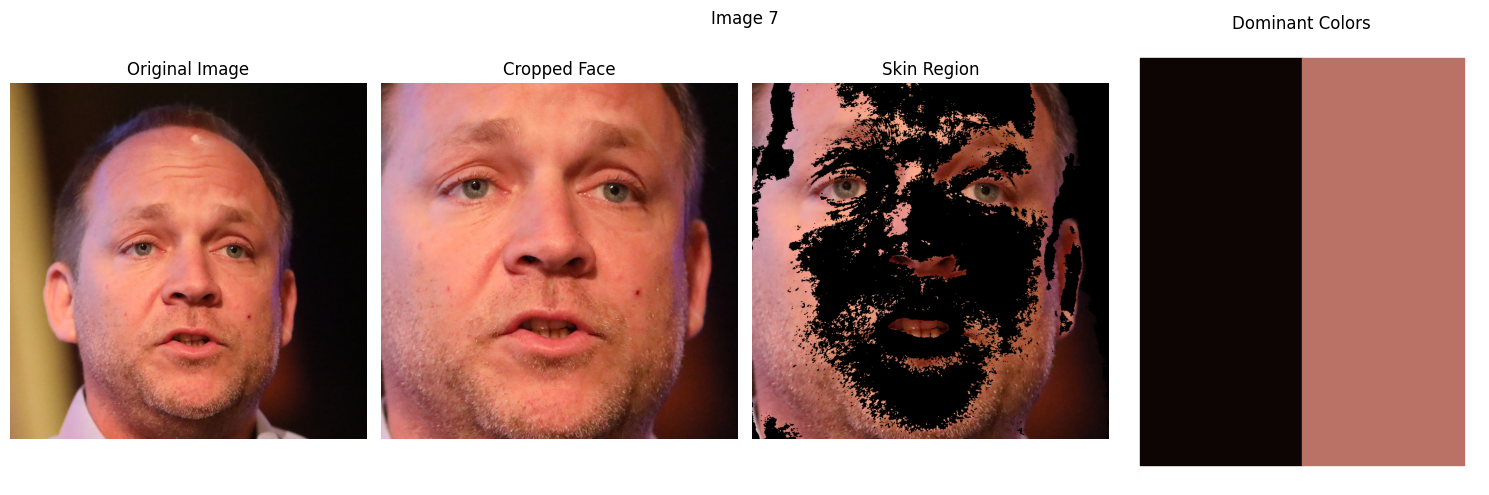

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


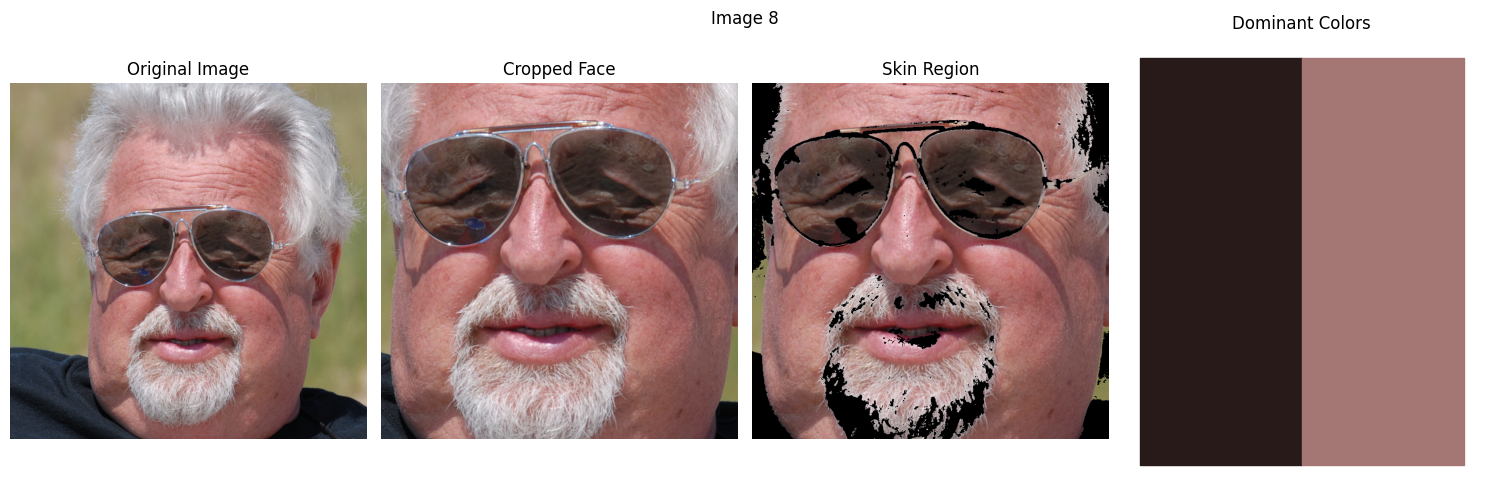

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


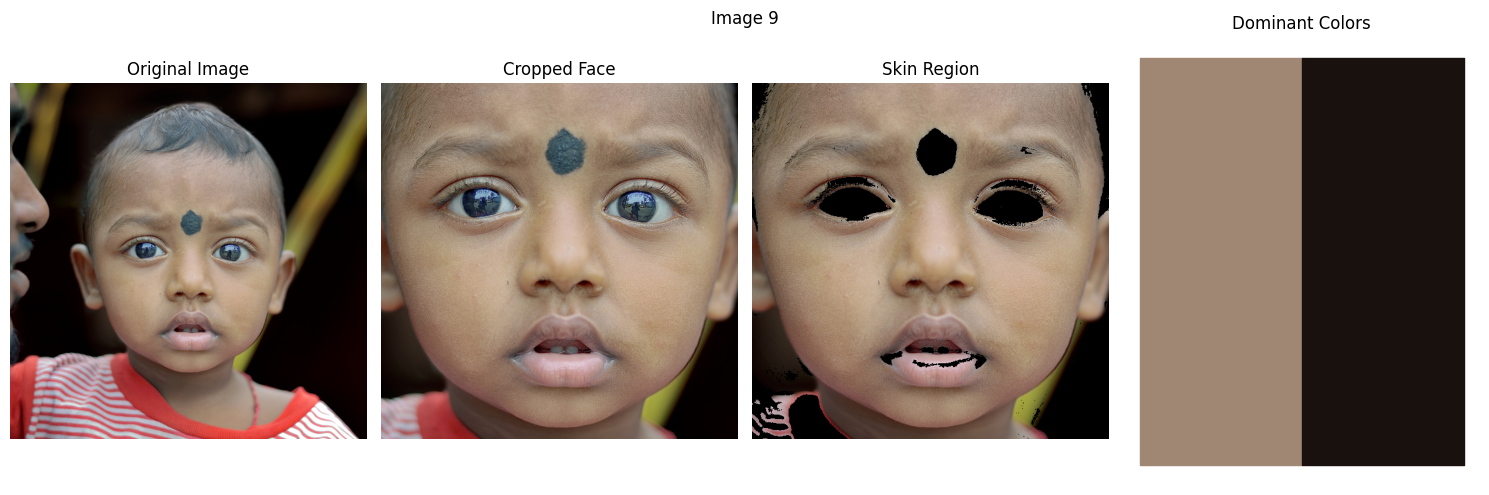

/Users/jeong-wonseok/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


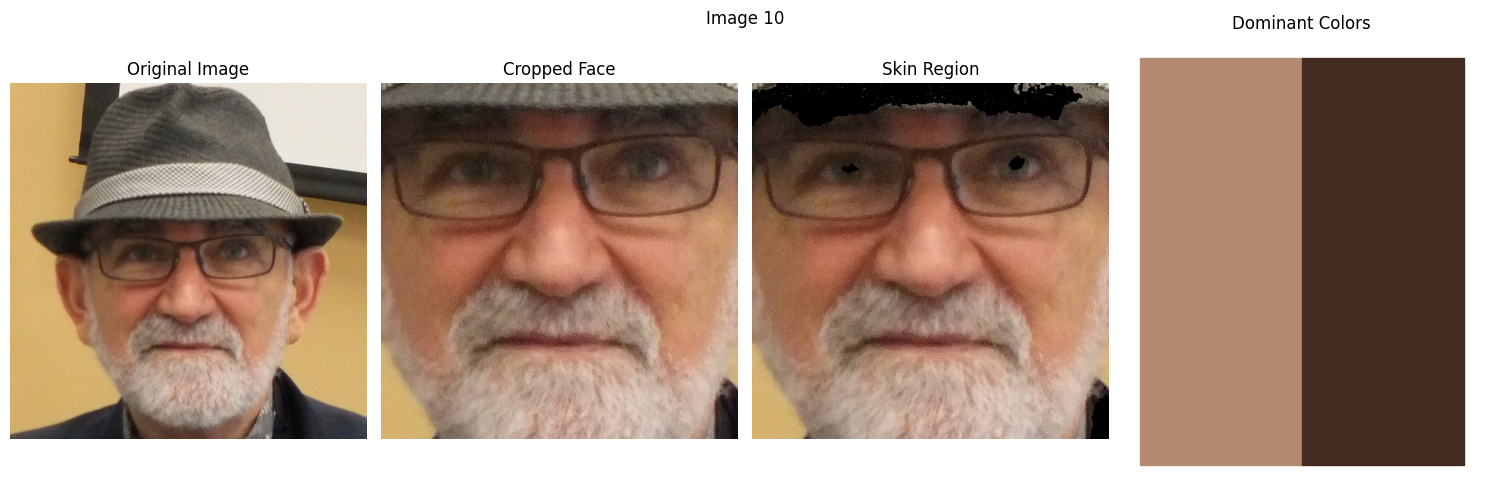

Warm Standard: [110.68766539  79.78467498  67.33355427]
Cool Standard: [99.1241892  68.22457878 60.77018111]


In [10]:
# FFHQ 데이터 처리
def process_images(image_paths):
    warm_b_std = []
    cool_b_std = []

    for idx, img_path in enumerate(image_paths):
        try:
            # 이미지 로드
            image = cv2.imread(img_path)

            # 얼굴 크롭
            cropped_face = extract_face_crop(image)

            # 피부 영역 추출
            skin = extract_skin(cropped_face)

            # 주요 색상 추출
            dominant_colors = extract_dominant_colors(skin, n_clusters=2)

            # 주요 색상 저장 (첫 번째: warm, 두 번째: cool)
            warm_b_std.append(dominant_colors[0])
            cool_b_std.append(dominant_colors[1])

            # 결과 시각화
            visualize_results(image, cropped_face, skin, dominant_colors, f"Image {idx+1}")

        except ValueError as e:
            print(f"Skipping {img_path}: {e}")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return np.mean(warm_b_std, axis=0), np.mean(cool_b_std, axis=0)

# 데이터 경로 설정
image_paths = glob.glob("data/00000/*.png")[:10]  # 10개만 테스트
warm_b_std, cool_b_std = process_images(image_paths)

# 결과 저장
std_values = {
    "warm_b_std": warm_b_std.tolist(),
    "cool_b_std": cool_b_std.tolist()
}

with open("color_standards.json", "w") as f:
    json.dump(std_values, f)

print("Warm Standard:", warm_b_std)
print("Cool Standard:", cool_b_std)
